#### Objective:
- Which variables are significant in predicting the demand for shared bikes.- 
How well those variables describe the bike demands

#### Importing libraries

In [279]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [281]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing data from CSV and removing the null columns

In [283]:
# Reading day.csv file.
df_bike = pd.read_csv('day.csv')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [285]:
# Check shape of dataframe
df_bike.shape

(730, 16)

In [287]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [289]:
# Checking the column informations.
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [291]:
# Checking for null values
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Data Cleaning

In [293]:
# Removing the columns 'instant', 'dteday, 'casual' and 'registered' as they are not useful for the analysis
df_bike.drop(['instant'],axis=1,inplace=True)
df_bike.drop(['dteday'],axis=1,inplace=True)
df_bike.drop(['casual'],axis=1,inplace=True)
df_bike.drop(['registered'],axis=1,inplace=True)

In [295]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [297]:
#### Creating categorical columns for 'season', 'mnth', 'weekday' and 'weathersit' 
df_bike.season = df_bike.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df_bike.mnth = df_bike.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df_bike.weekday = df_bike.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_bike.weathersit = df_bike.weathersit.map({1:'clear',2:'mist',3:'ligh_snow',4:'heavy_rain'})
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Data Visualization

<Figure size 1500x3000 with 0 Axes>

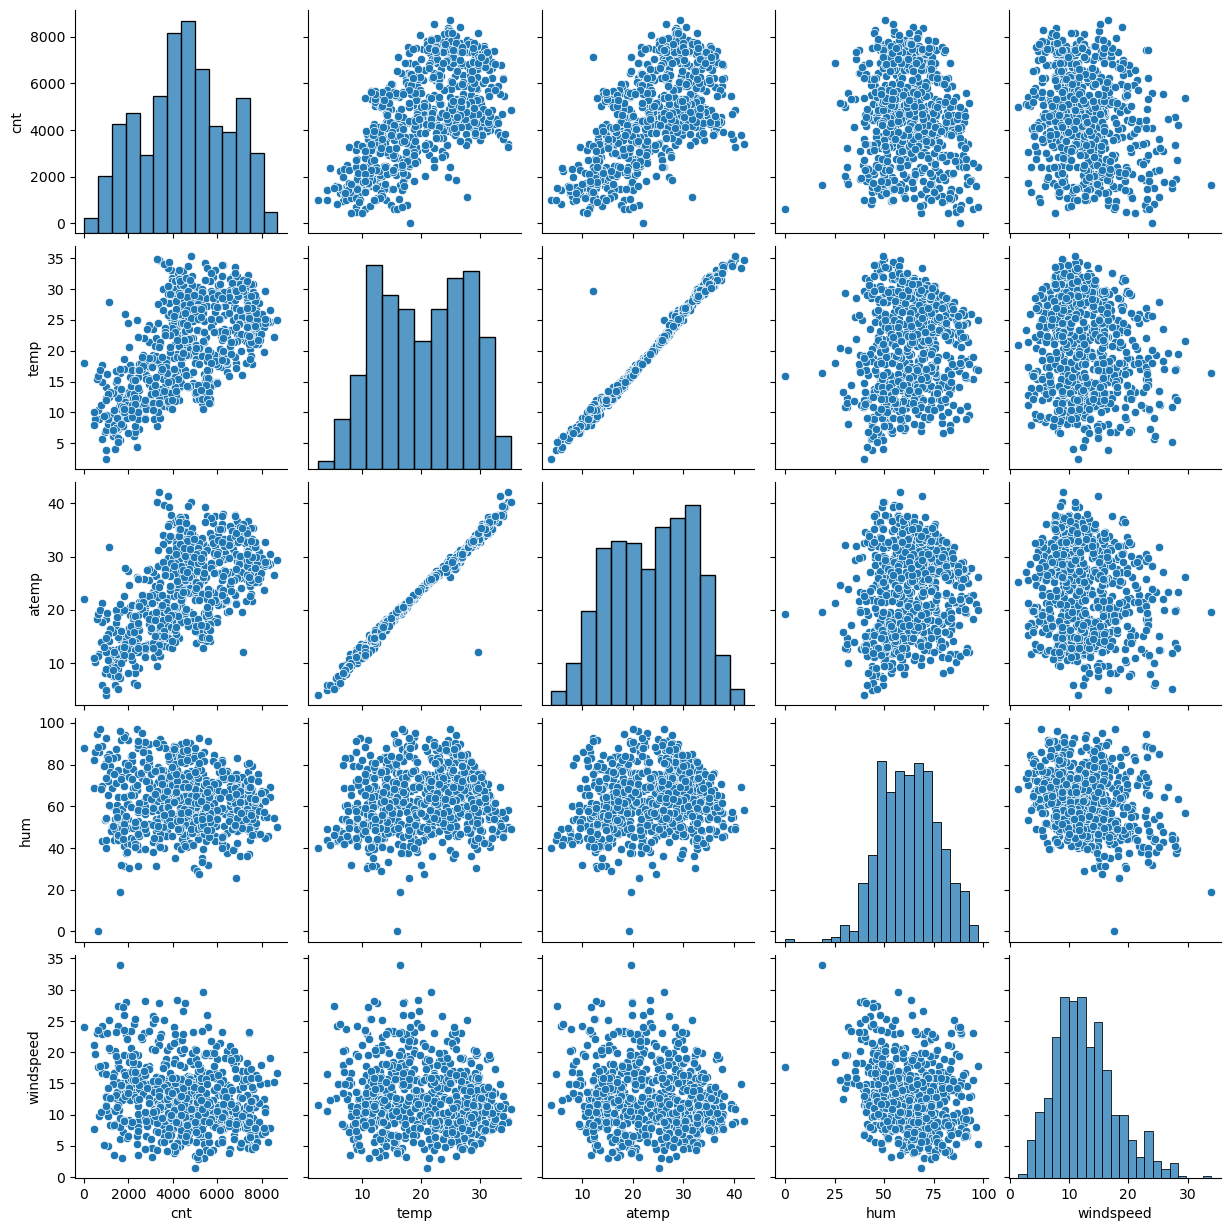

In [299]:
# Displaying pairplots for numerical columns to view correlation
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bike, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [17]:
# Observations:
# 1. From the above plots we can see that the features 'temp' and 'atemp' have a decent correlation with 'cnt'.
# 2. There is a very high correlation between the features 'temp' and 'atemp'.

<Axes: xlabel='weathersit', ylabel='cnt'>

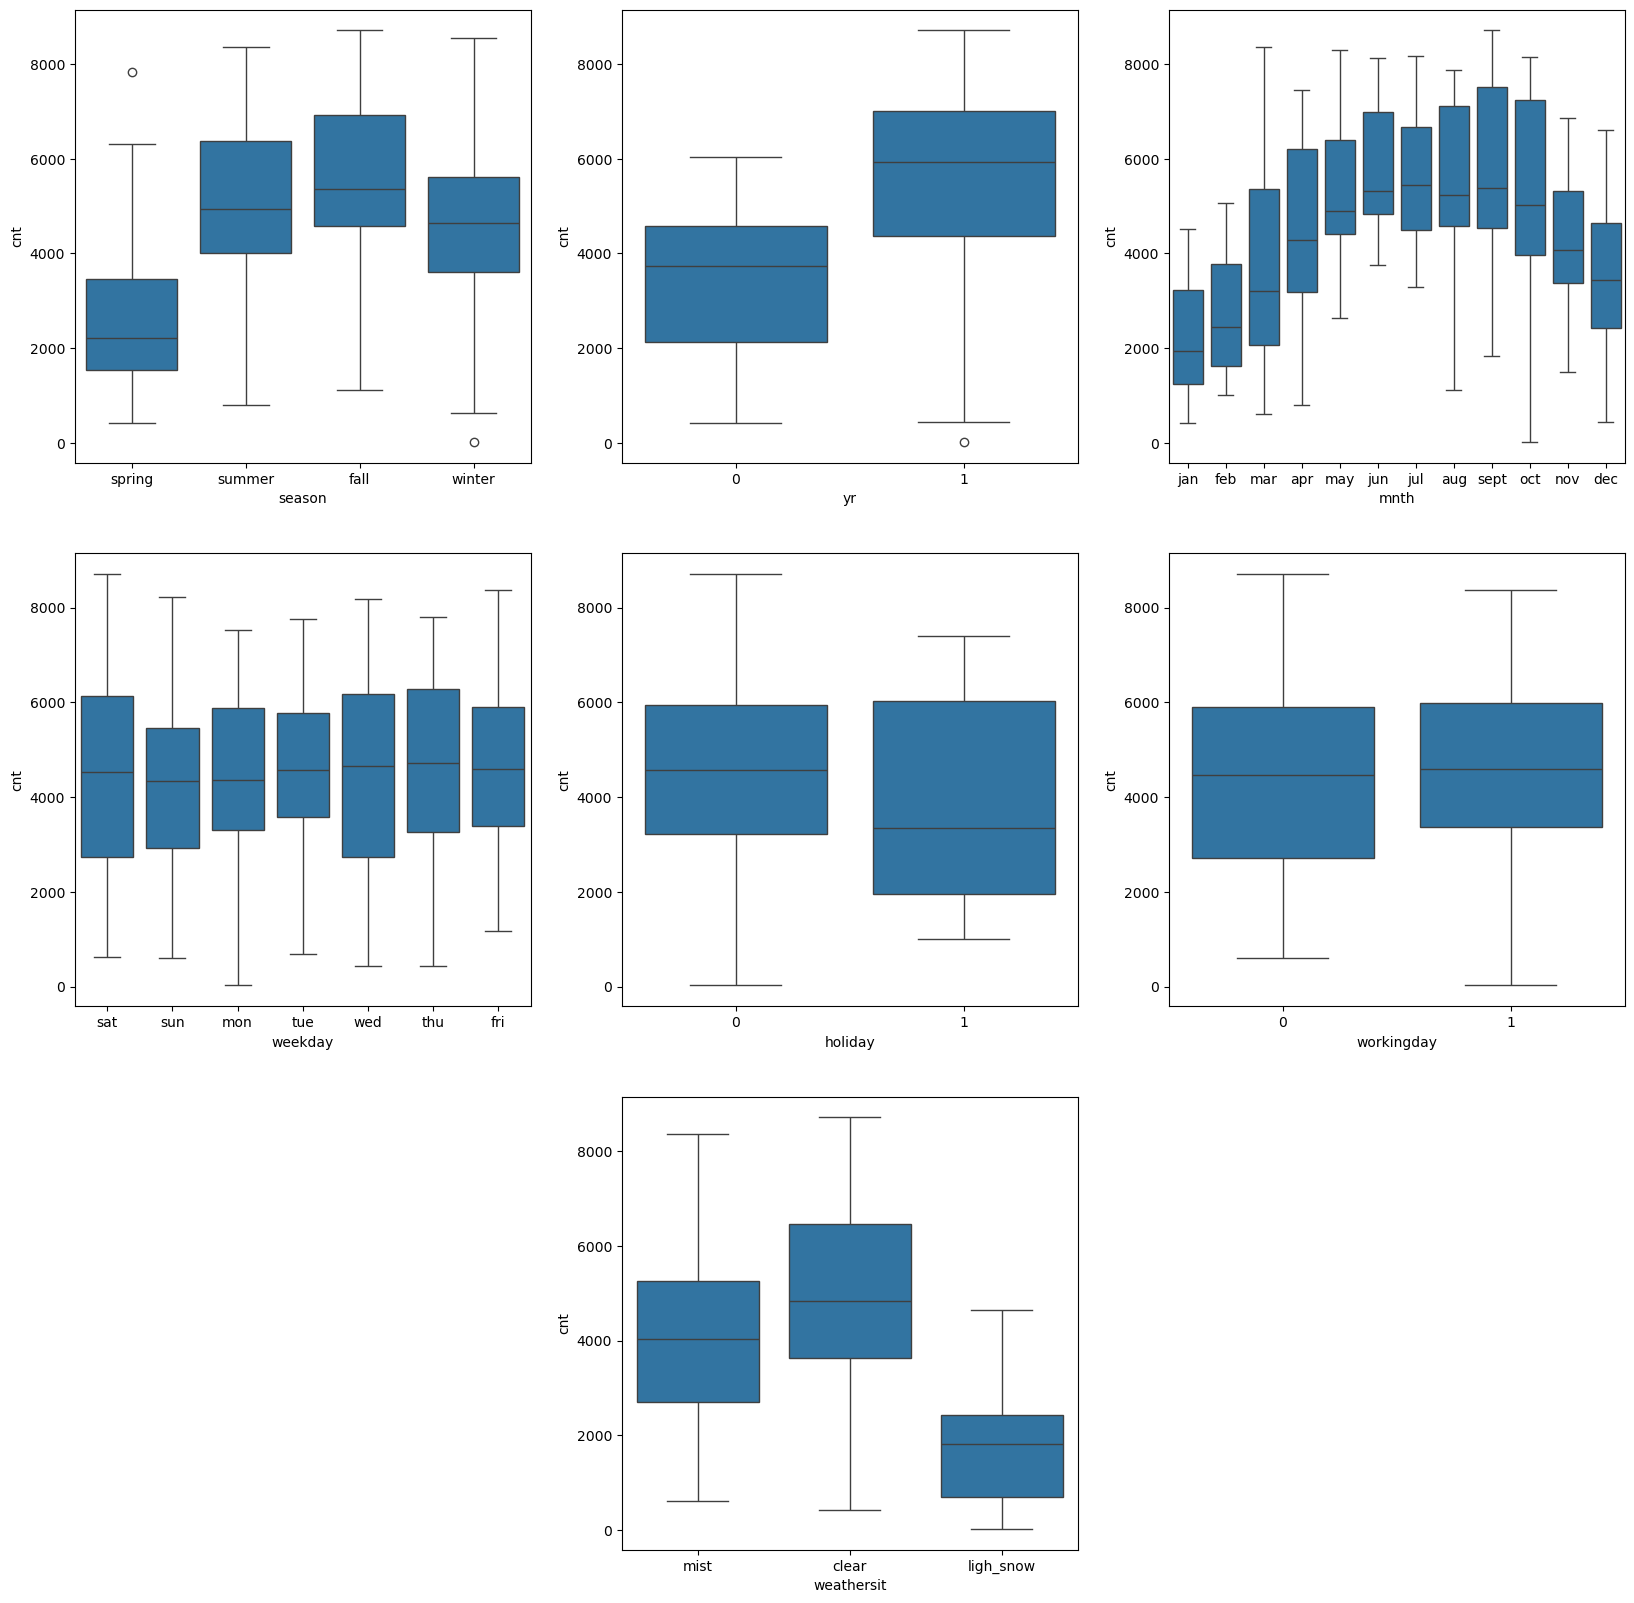

In [301]:
# Displaying boxplots for the categorical fields
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df_bike)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df_bike)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df_bike)

plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt',data=df_bike)

plt.subplot(3,3,5)
sns.boxplot(x='holiday',y='cnt',data=df_bike)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df_bike)

plt.subplot(3,3,8)
sns.boxplot(x='weathersit',y='cnt',data=df_bike)

In [19]:
# Observations:
# 1. We can see that in the chart for the feature 'season', there is a high count for the 'summer', 'fall' and 'winter', but 'spring' has a low count.
# 2. In the 'year' chart, there is a high for the year '2019' when compared to '2018'.
# 3. In the 'mnth' chart, there is a high count for the months May to Oct, but for the other months it gradually reduces with Jan having the least.
# 4. In the 'weathersit' chart, the highest count in for 'clear', with 'mist' having a decent count and 'light_snow' having a very low one.

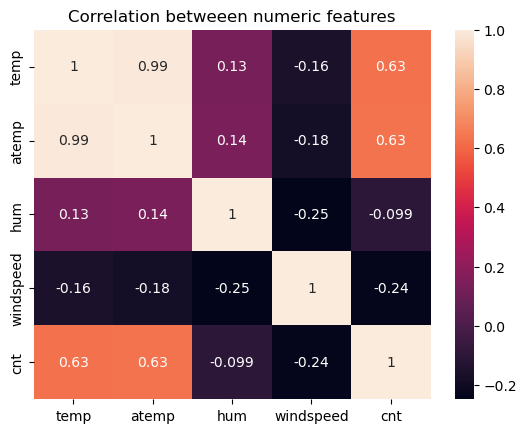

In [303]:
# Heatmap to identify correlation between numeric features
num_features = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.title("Correlation betweeen numeric features")
sns.heatmap(df_bike[num_features].corr(), annot= True)
plt.show()

In [21]:
# Observations:
# 1. 'cnt' has a good correlation with the features 'temp' and 'atemp'
# 2. There is basically a linear relationship between the features 'temp' and 'atemp'.

#### Data Preparation

In [305]:
df_bike = pd.get_dummies(data=df_bike,columns=["season","mnth","weekday",'weathersit'],drop_first=True)
# bike_df = pd.get_dummies(data=bike_df,columns=[""])

In [307]:
df_bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_ligh_snow', 'weathersit_mist'],
      dtype='object')

In [309]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_spring         730 non-null    bool   
 9   season_summer         730 non-null    bool   
 10  season_winter         730 non-null    bool   
 11  mnth_aug              730 non-null    bool   
 12  mnth_dec              730 non-null    bool   
 13  mnth_feb              730 non-null    bool   
 14  mnth_jan              730 non-null    bool   
 15  mnth_jul              7

In [311]:
# Convert bool columns to int
df_bike[['season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_ligh_snow', 'weathersit_mist']] = df_bike[['season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_ligh_snow', 'weathersit_mist']].astype(int)

In [313]:
df_bike_new = df_bike

#### Splitting data into Training and Testing Sets

In [317]:
# Train/Test split with 70:30 ratio
df_train, df_test = train_test_split(df_bike_new, train_size = 0.7, random_state = 100)

In [319]:
# Checking shape and size for train and test sets
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [323]:
# Using MinMax scaler for scalling the continuous variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [327]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_ligh_snow,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


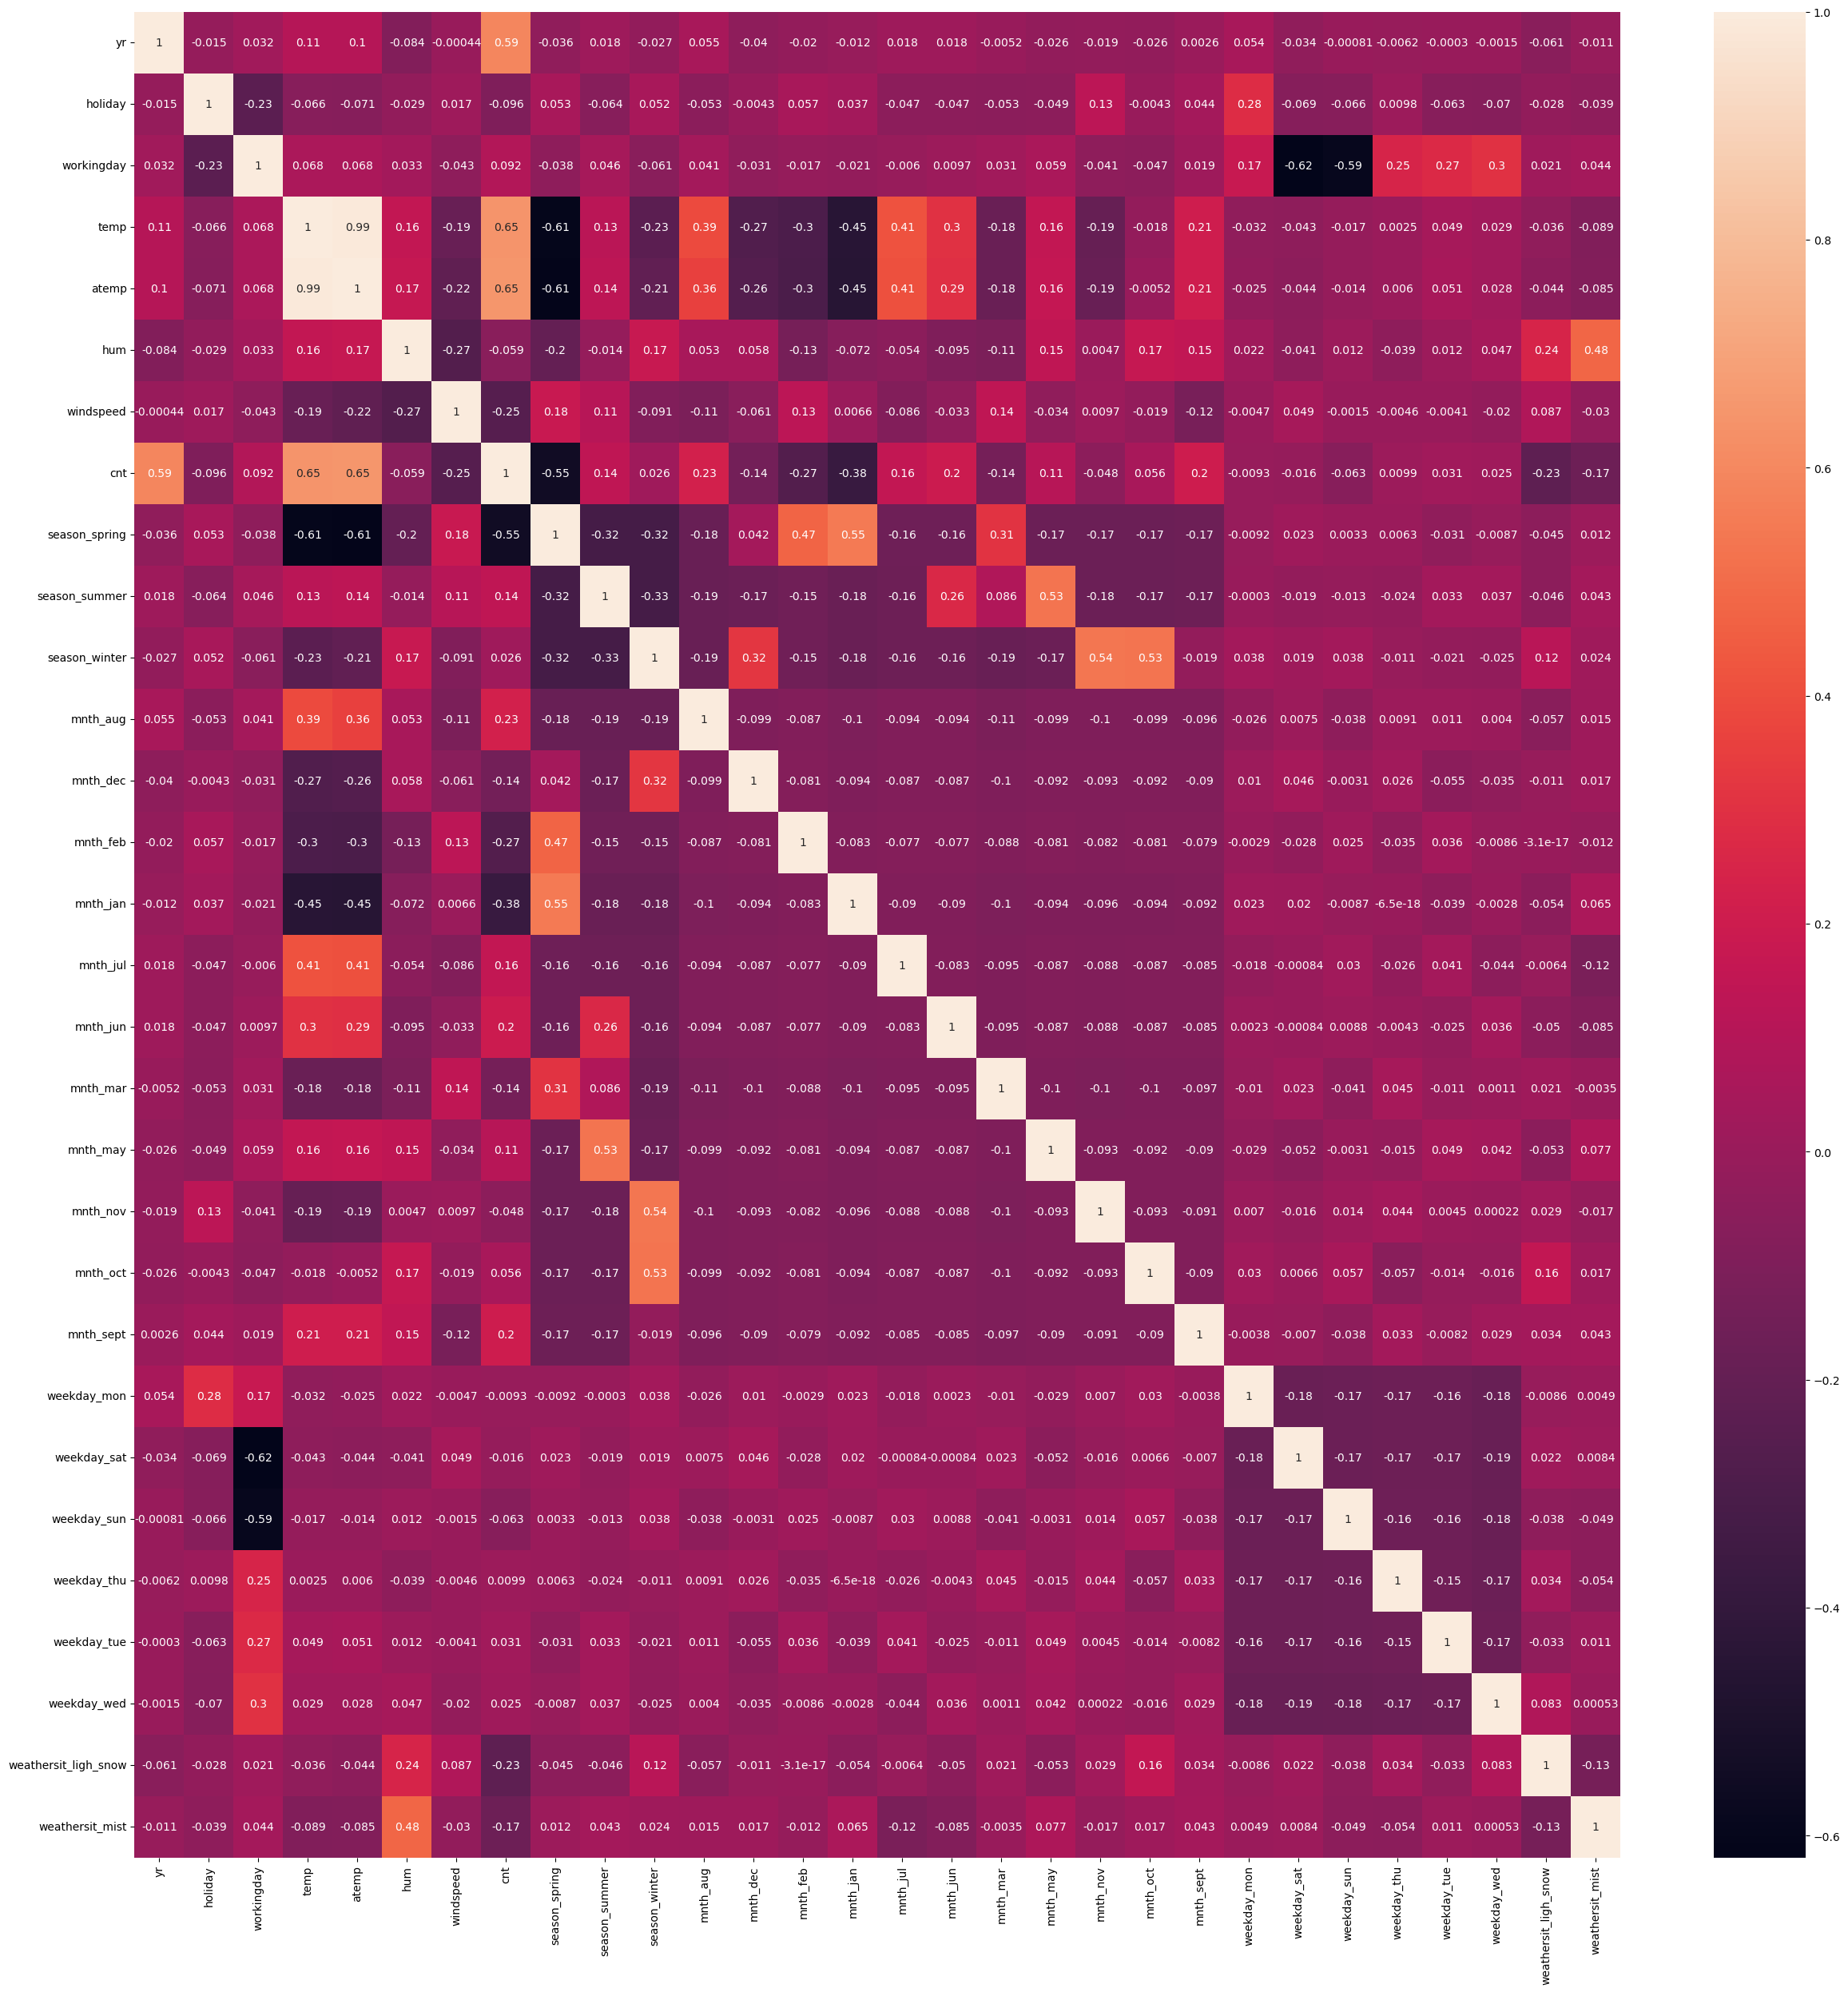

In [329]:
# Verifying correlation between variables
plt.figure(figsize = (30, 30))  
sns.heatmap(df_train.corr(), annot = True)
plt.show()

#### Building Linear Regression Model - RFE Method

In [331]:
# Seperating target variable and independent variables
y_train = df_train.pop('cnt')
X_train = df_train

In [333]:
# Build model
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [335]:
# Use RFE method to reduce the number of features to 15
rfe = RFE(lr, n_features_to_select = 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [337]:
# List of variables and thier rank in the selection 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 13),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 7),
 ('mnth_may', False, 4),
 ('mnth_nov', False, 10),
 ('mnth_oct', False, 3),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_ligh_snow', True, 1),
 ('weathersit_mist', True, 1)]

In [339]:
# List of columns selected by RFE method
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_ligh_snow',
       'weathersit_mist'],
      dtype='object')

In [341]:
# Creeating new dataframe with the 15 columns supported by RFE
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_ligh_snow',
       'weathersit_mist']]

#### Creating functions for repeat operations

In [343]:
# Function for calculating the VIF and displaying them for the input columns
def calculate_VIF(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [345]:
#Function to build a model using statsmodel api
def build_lm(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Building Linear Regression Model - Manual Method

##### Model 1

In [347]:
# Building the 1st model using the columns identified from the RFE method
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_ligh_snow',
       'weathersit_mist']

build_lm(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        18:23:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1995 

In [349]:
calculate_VIF(cols)

,Features,VIF
2,workingday,50.68
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
14,weathersit_mist,1.57


In [351]:
# Observations:
# 1. In the 'OLS Regression Results', 'holiday has a high p-value. 
# 2. In the 'VIF Results', 'workingday' has a very high VIF.
# 3. We will remove the 'holiday' variable as p-value has higher priority.

##### Model 2

In [353]:
# Building the 2nd model after removing the column 'holiday'
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_ligh_snow',
       'weathersit_mist']

build_lm(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        18:26:55   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1811 

In [355]:
calculate_VIF(cols)

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_sat,4.91
5,season_spring,4.80
11,weekday_sun,4.76
7,season_winter,3.69
6,season_summer,3.04
13,weathersit_mist,2.31


In [120]:
# Observations:
# 1. In the 'OLS Regression Results', none of the features have a high p-value.
# 2. In the 'VIF Results', 'hum' has a very high VIF and can be removed.

##### Model 3

In [357]:
# Building the 3rd model after removing the column 'hum'
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_ligh_snow', 'weathersit_mist']

build_lm(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.28e-188
Time:                        18:27:53   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1008 

In [359]:
calculate_VIF(cols)

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,weekday_sat,4.45
10,weekday_sun,4.21
4,season_spring,3.82
6,season_winter,2.78
5,season_summer,2.76
0,yr,2.07
7,mnth_jul,1.60


In [136]:
# Observations:
# 1. In the 'OLS Regression Results', none of the features have a high p-value.
# 2. In the 'VIF Results', 'workingday' has a high VIF and can be removed.

##### Model 4

In [361]:
# Building the 4th model after removing the column 'workingday'
cols = ['yr', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_ligh_snow', 'weathersit_mist']

build_lm(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.06e-186
Time:                        18:28:56   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2003 

In [363]:
calculate_VIF(cols)

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,season_summer,2.24
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_jul,1.59
11,weathersit_mist,1.55
7,mnth_sept,1.33
8,weekday_sat,1.22


In [143]:
# Observations:
# 1. In the 'OLS Regression Results', 'weekday_sat' has a high p-value and can be removed.
# 2. In the 'VIF Results', 'temp' has a VIF slightly above the limit of 5.

##### Model 5

In [365]:
# Building the 5th model after removing the column 'weekday_sat'
cols = ['yr', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sun', 'weathersit_ligh_snow', 'weathersit_mist']

build_lm(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.37e-187
Time:                        18:30:42   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2034 

In [367]:
calculate_VIF(cols)

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_jul,1.59
10,weathersit_mist,1.55
7,mnth_sept,1.33
8,weekday_sun,1.17


In [150]:
# Observations:
# 1. In the 'OLS Regression Results', none of the features have a high p-value and can be removed.
# 2. In the 'VIF Results', 'temp' has a VIF slightly above the limit.

###### Note: When we tried to remove the 'temp' column and build the model again, the p-value of 'mnth_jul' became very high. So we decided to remove the 'mnth_jul' column.

##### Model 6

In [420]:
# Building the 5th model after removing the column 'mnth_jul'
cols = ['yr', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'mnth_sept', 'weekday_sun', 'weathersit_ligh_snow', 'weathersit_mist']

build_lm(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.70e-187
Time:                        18:45:31   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1956 

In [422]:
calculate_VIF(cols)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.91
5,season_winter,1.64
9,weathersit_mist,1.55
6,mnth_sept,1.22
7,weekday_sun,1.17
8,weathersit_ligh_snow,1.08


In [175]:
# Observations:
# 1. The 'R-Square' and 'Adj R-Square' are at '0.833' and '0.830', which is a good value and there is not much difference between them.
# 2. The 'Prob (F-statistic)' is also very low, which states that the model is sigificant.
# 3. In the 'OLS Regression Results', none of the features have a high p-value.
# 4. In the 'VIF Results', none of the features have a high VIF.
# 5. From all the above observations, we can finalize and use this model.

In [424]:
# Checking the parameters and their coefficient values
X_train_sm = sm.add_constant(X_train[cols])
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const                   0.195618
yr                      0.234391
temp                    0.479457
windspeed              -0.149843
season_spring          -0.057246
season_summer           0.062339
season_winter           0.093716
mnth_sept               0.085435
weekday_sun            -0.046099
weathersit_ligh_snow   -0.285587
weathersit_mist        -0.078980
dtype: float64

#### Residual Analysis

In [426]:
X_train_sm.head()

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_sept,weekday_sun,weathersit_ligh_snow,weathersit_mist
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,0,1
111,1.0,0,0.345824,0.380981,0,1,0,0,0,0,1


In [428]:
y_train_pred = lr.predict(X_train_sm)

In [430]:
y_train.describe()

count    510.000000
mean       0.513499
std        0.224421
min        0.000000
25%        0.356420
50%        0.518638
75%        0.684710
max        1.000000
Name: cnt, dtype: float64

In [432]:
# Calculating the R-squared score
r2_score(y_train, y_train_pred)

0.8333418171181378

Text(0.5, 0, 'Errors')

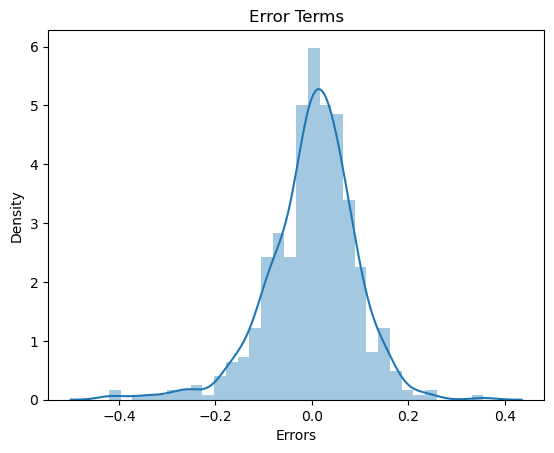

In [434]:
# Plot the histogram of the error terms
plt.figure()
sns.distplot((y_train - y_train_pred))
plt.title('Error Terms')
plt.xlabel('Errors')

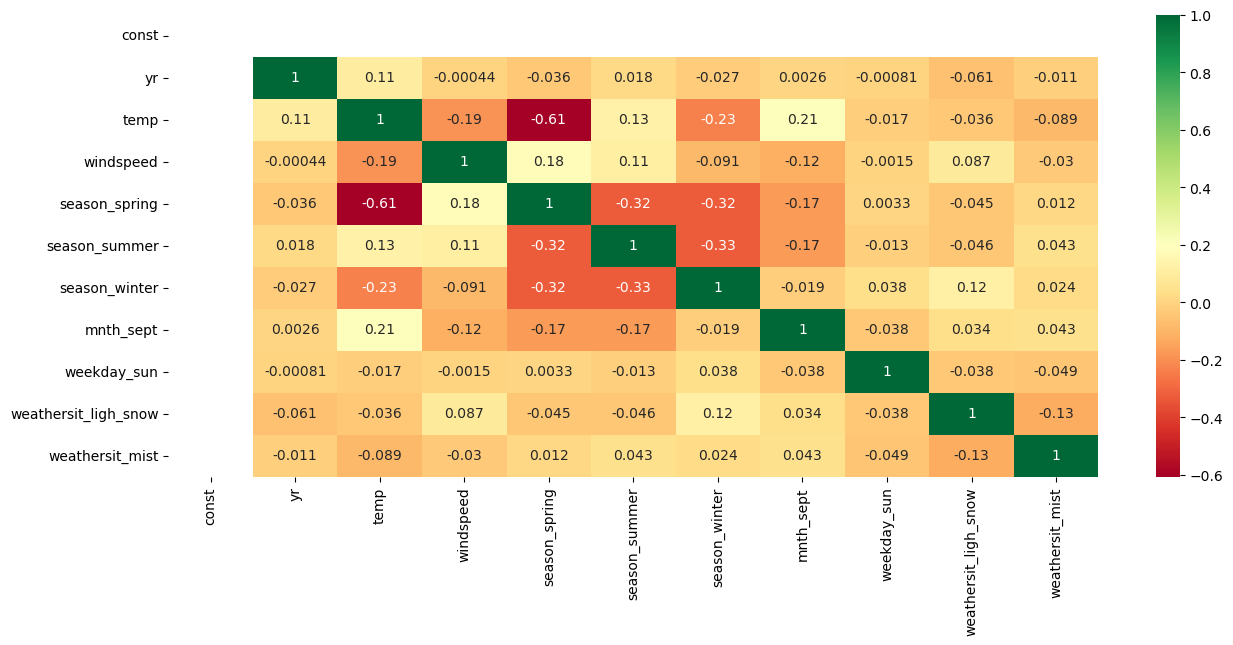

In [436]:
plt.figure(figsize=(15,6))
sns.heatmap(X_train_sm.corr(),annot = True, cmap="RdYlGn")
plt.show()

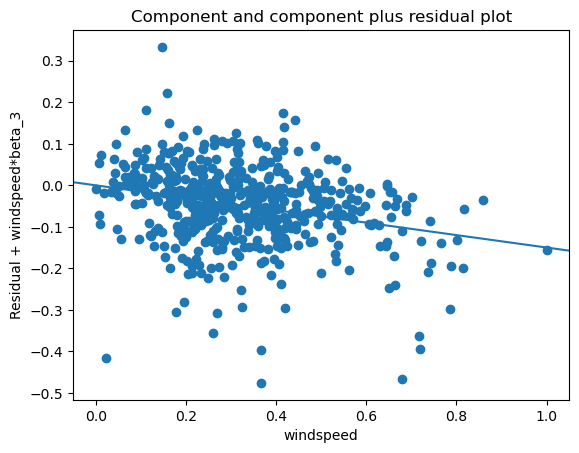

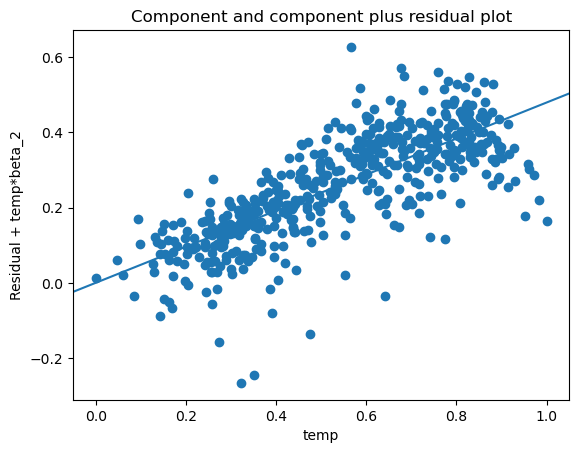

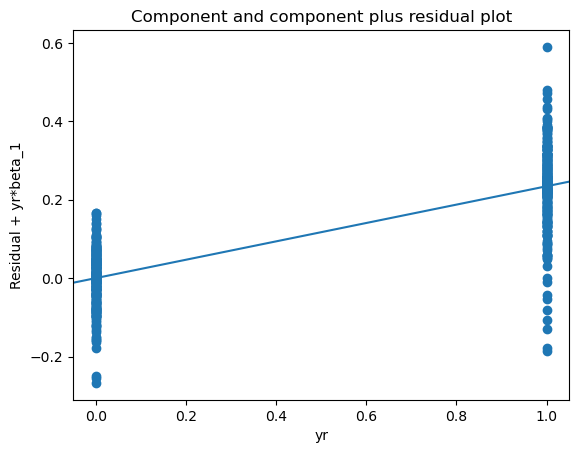

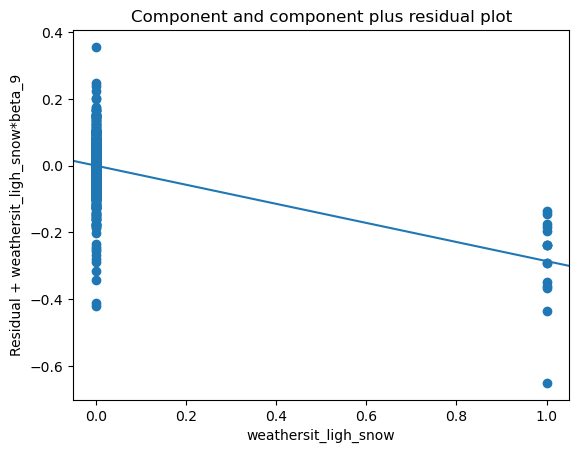

In [438]:
# Validating the Linear relationship using CCPR plot
sm.graphics.plot_ccpr(lr, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr, 'yr')
plt.show()

sm.graphics.plot_ccpr(lr, 'weathersit_ligh_snow')
plt.show()

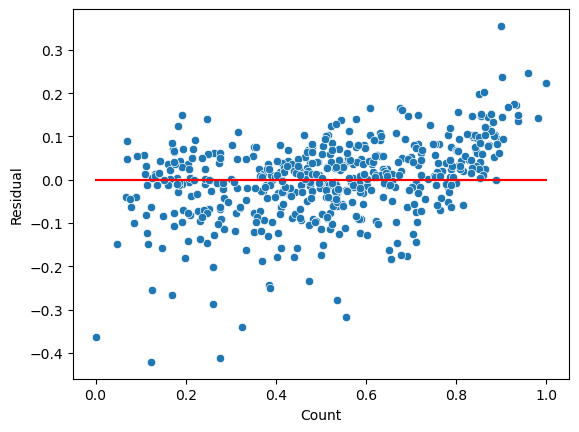

In [440]:
# Checking for Homoscedasticity
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Model Predictions on Test Data

In [405]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_ligh_snow,weathersit_mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [407]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_ligh_snow,weathersit_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [409]:
# Seperating target variable and independent variables
y_test = df_test.pop('cnt')
X_test = df_test

In [442]:
X_test = X_test[cols]

In [444]:
X_test.head()

,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_sept,weekday_sun,weathersit_ligh_snow,weathersit_mist
184,0,0.831783,0.084219,0,0,0,0,0,0,1
535,1,0.901354,0.153728,0,1,0,0,0,0,0
299,0,0.511964,0.334206,0,0,1,0,0,0,1
221,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,1,0,0,0,0,0


In [446]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [448]:
# Calculating the R-squared score
r2_score(y_test, y_test_pred)

0.803190810381663

Text(0.5, 0, 'Errors')

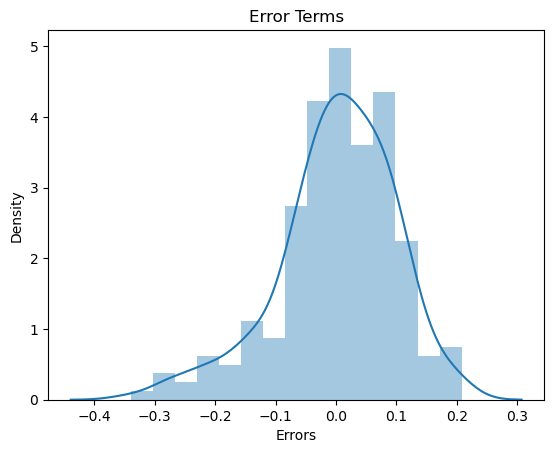

In [450]:
# Plot the histogram of the error terms
plt.figure()
sns.distplot((y_test - y_test_pred))
plt.title('Error Terms')
plt.xlabel('Errors')

#### Model Evaluation

Text(0, 0.5, 'y_test_pred')

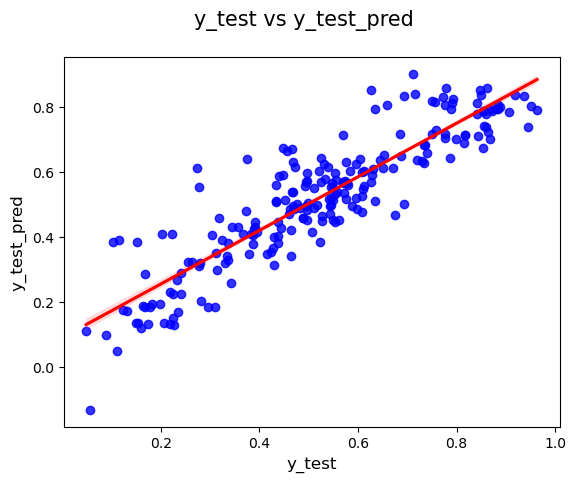

In [455]:
fig = plt.figure()
sns.regplot(x = y_test, y = y_test_pred, ci = 68, fit_reg = True,scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})
fig.suptitle('y_test vs y_test_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 12)                          
plt.ylabel('y_test_pred', fontsize = 12)

In [467]:
# Calculating Adjusted-R^2 value for the test dataset
1-(1-(r2_score(y_test, y_test_pred)))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)

0.793774102744422

##### Observations:
- Train dataset R^2 = 0.833
- Train dataset Adjusted R^2 = 0.830    
- Test dataset R^2 = 0.803
- Test dataset Adjusted R^2 = 0.794

In [465]:
# Identifying features which are significant and thier coef values
lr.params

const                   0.195618
yr                      0.234391
temp                    0.479457
windspeed              -0.149843
season_spring          -0.057246
season_summer           0.062339
season_winter           0.093716
mnth_sept               0.085435
weekday_sun            -0.046099
weathersit_ligh_snow   -0.285587
weathersit_mist        -0.078980
dtype: float64

##### From the above data we can say that the equation for our best fitted line is:
cnt = 0.1956 + (0.2344 * yr) + (0.4795 * temp) - (0.1498 * windspeed) - (0.0573 * season_spring) + (0.0623 * season_summer) + (0.0937 * season_winter) + (0.0854 * mnth_sept) - (0.0461 * weekday_sun) - (0.2856 * weathersit_ligh_snow) - (0.0790 * weathersit_mist)

#### Conclusion

##### The significant variables which can be used to predict the demand for the shared bikes:
- yr
- temp
- windspeed
- season_spring
- season_summer
- season_winter
- mnth_sept
- weekday_sun
- weathersit_ligh_snow
- weathersit_mist